# 1.How can we load the dataset from a CSV file into a Pandas DataFrame?

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("Employee_Salaries.csv")

# 2. What is the dimension (number of rows and columns) of the dataset? What are the data types of the variables?

In [18]:
df.shape

(10291, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


# 3.How can we identify missing values in the dataset and summarize it using describe()?

In [21]:
df.isnull()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
10286,False,False,False,False,False,False,False,False
10287,False,False,False,False,False,False,False,True
10288,False,False,False,False,False,False,False,False
10289,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [23]:
print(df.describe(include='all'))

       Department                          Department_Name  \
count       10291                                    10291   
unique         42                                       42   
top           HHS  Department of Health and Human Services   
freq         1877                                     1877   
mean          NaN                                      NaN   
std           NaN                                      NaN   
min           NaN                                      NaN   
25%           NaN                                      NaN   
50%           NaN                                      NaN   
75%           NaN                                      NaN   
max           NaN                                      NaN   

                             Division Gender    Base_Salary   Overtime_Pay  \
count                           10291  10291   10291.000000   10291.000000   
unique                            627      2            NaN            NaN   
top     HHS 60 School

# 4.Are there any missing values in the dataset? How can we handle them using Pandas?

In [25]:
df.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [26]:
df2=df.copy()

In [27]:
for col in df2.columns:
    if df2[col].isnull().any():
        df2[col]=df2[col].ffill()
df2.isnull().sum()


Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

# 5.Are there duplicate employee records, and how can we remove them?

In [29]:
duplicates = df.duplicated().sum()
print("Duplicate Records:", duplicates)

Duplicate Records: 617


In [30]:
df = df.drop_duplicates()

In [31]:
duplicates = df.duplicated().sum()
print("Duplicate Records:", duplicates)

Duplicate Records: 0


# 6.How can we convert incorrect data types (e.g., date columns to datetime, categorical columns to category)?

In [33]:
df.columns

Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')

In [34]:
if 'Department' in df.columns:
    df['Department'] = pd.to_datetime(df['Department'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_12728\2066430132.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Department'] = pd.to_datetime(df['Department'], errors='coerce')


# 7.How can we normalize numerical variables (e.g., scaling salary data to a range between 0 and 1)?

In [36]:
if 'Base_Salary' in df.columns:
    df['Base_Salary'] = (df['Base_Salary'] - df['Base_Salary'].min()) / (df['Base_Salary'].max() - df['Base_Salary'].min())

In [37]:
df['Base_Salary']

0        0.586520
1        0.478778
2        0.448003
3        0.278742
4        0.241407
           ...   
10285    0.525737
10287    0.725949
10288    0.260700
10289    0.310058
10290    0.594009
Name: Base_Salary, Length: 9674, dtype: float64

# 8.Are there any outliers in the salary column, and how can we handle them?

In [39]:
Q1 = df['Base_Salary'].quantile(0.25)
Q3 = df['Base_Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Base_Salary'] < (Q1 - 1.5 * IQR)) | (df['Base_Salary'] > (Q3 + 1.5 * IQR))]
print("Outliers in Salary:", outliers.shape[0])

Outliers in Salary: 253


In [40]:
df = df[~df['Base_Salary'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)] # removing outliers

In [41]:
Q1 = df['Base_Salary'].quantile(0.25)
Q3 = df['Base_Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Base_Salary'] < (Q1 - 1.5 * IQR)) | (df['Base_Salary'] > (Q3 + 1.5 * IQR))]
print("Outliers in Salary:", outliers.shape[0])

Outliers in Salary: 19


# 9.How can we make column names lowercase and remove spaces for consistency?

In [43]:
df.columns

Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')

In [44]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [45]:
df.columns

Index(['department', 'department_name', 'division', 'gender', 'base_salary',
       'overtime_pay', 'longevity_pay', 'grade'],
      dtype='object')

# 10.How can we detect and remove outliers in numerical columns (e.g., salary or age)?

In [47]:
for col in ['salary']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[df[col].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]
print("Outliers in Salary:", df.shape[0])

Outliers in Salary: 253


# 11.How can we visualize relationships between variables using Seaborn (e.g., salary distribution, gender ratio)?

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

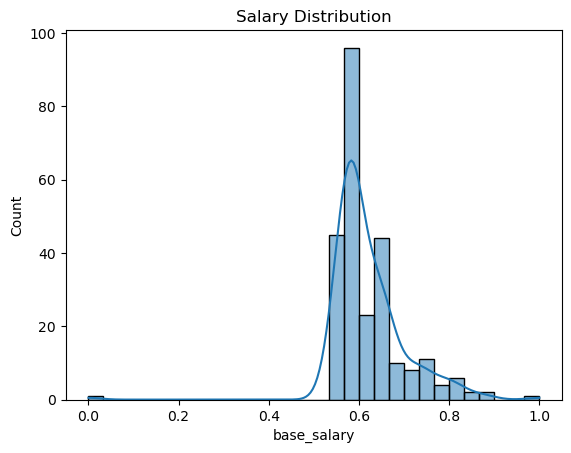

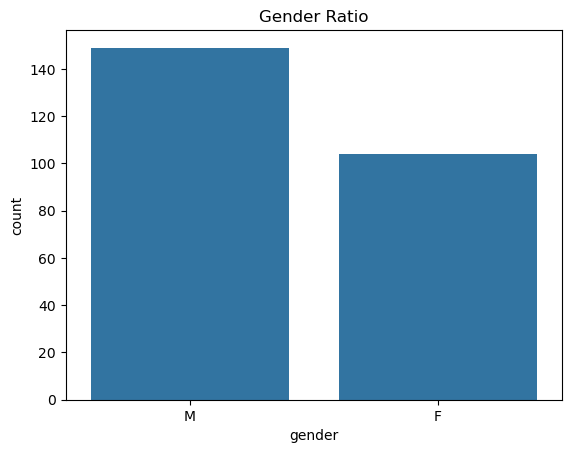

Data Processing Completed!


In [50]:
sns.histplot(df['base_salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

if 'gender' in df.columns:
    sns.countplot(x='gender', data=df)
    plt.title("Gender Ratio")
    plt.show()

print("Data Processing Completed!")


# 12.How can we calculate the average salary for each department?

In [52]:
import numpy as np

In [53]:
if 'department' in df.columns:
    avg_salary_by_dept = df.groupby('department')['base_salary'].mean()
    print("Average Salary by Department:\n", avg_salary_by_dept)

Average Salary by Department:
 Series([], Name: base_salary, dtype: float64)
